## Text Processing
<li>Extract short lyrics</li>

## Formal Structure
<li>CMU Pronouncing Dictionary</li>
<li>Assonance Definition</li>

## Concreteness/Abstractness
<li>Harvard General Inquirer</li>
<li>Normalization by line</li>

## Classification

## Preparation

In [2]:
%pylab inline
import numpy as np
from datascience import *
import pandas as pd
import string
import nltk
from nltk.corpus import cmudict

Populating the interactive namespace from numpy and matplotlib


# Formatting

In [3]:
with open('pound_poems.txt') as file_in:
    collection = file_in.read()
collection_list = collection.split('\n'*5)

In [4]:
##Constants 
invalid_input = 'nan'
max_length = 10

In [5]:
dates = []
anthologies = []
titles = []
lines = []
poem_length = []
for poem in collection_list:
    line_list = poem.split('\n')
    titles.append(line_list.pop(0))
    lines.append(line_list)
    poem_length.append(len(line_list))

In [5]:
raw_poem_tb = Table().with_columns([
        'Title', titles,
        'Text', lines,
        'Number of Lines', poem_length])

In [6]:
#Delete
raw_poem_tb

Title,Text,Number of Lines
A Girl,"['The tree has entered my hands,', 'The sap has ascended ...",10
A Pact,"['I make a pact with you, Walt Whitman -', 'I have detes ...",9
A Virginal,"['No, no! Go from me. I have left her lately.', 'I will ...",14
In A Station of the Metro,"['The apparition of these faces in the crowd:', 'Petals ...",2
Middle Aged,"[""'Tis but a vague, invarious delight."", 'As gold that r ...",23
"To Whistper, American","['You also, our first great,', 'Had tried all ways;', 'T ...",19
Envoi,"['Go, dumb-born book,', 'Tell her that sang me once that ...",26
Portrait d'une Femme,"['Your mind and you are our Sargasso Sea,', 'London has ...",30
The River-Merchant's Wife: A Letter,['While my hair was still cut straight across my forehea ...,30
Alba,"['As cool as the pale wet leaves ', 'of lily-of-the-vall ...",3


In [7]:
reception_mask = (raw_poem_tb['Number of Lines']<=max_length)
short_lyric_tb = raw_poem_tb.where(reception_mask)

In [8]:
short_lyric_titles = short_lyric_tb['Title']
text_columns = [[], [], [], [], [], [], [], [], [], []]
for _poem in short_lyric_tb['Text']:
    for x in range(0, 10):
        if x < len(_poem):
            text_columns[x].append(_poem[x])
        else:
            text_columns[x].append(invalid_input)

In [9]:
line_tb = Table(short_lyric_titles)
line_tb = line_tb.with_rows(text_columns)

In [10]:
#Delete
line_tb

A Girl,A Pact,In A Station of the Metro,Alba,An Immorality,And The Days Are Not Full Enough,"Fan-Piece, For Her Imperial Lord",Grace Before Song,"Ione, Dead the Long Year",Ité,L'Art,Meditatio,Notes for Canto CXX,Quies,Salutation,Statement of Being,Sub-Mare,Taking Leave of a Friend,Tame Cat,The Bath-Tub,The Encounter,The Seeing Eye,Ts'ai Chi'h
"The tree has entered my hands,","I make a pact with you, Walt Whitman -",The apparition of these faces in the crowd:,As cool as the pale wet leaves,"Sing we for love and idleness,",And the days are not full enough,"O fan of white silk,",Lord God of heaven that with mercy dight,"Empty are the ways,","Go, my songs, seek your praise from the young","Green arsenic smeared on an egg-white cloth,",When I carefully consider the curious habits of dogs,I have tried to write Paradise,This is another of our ancient loves.,O generation of the thoroughly smug,I am a grave poetic hen,"It is, and is not, I am sane enough,","Blue mountains to the north of the walls,",It rests me to be among beautiful women,"As a bathtub lined with white porcelain,",All the while they were talking the new morality,The small dogs look at the big dogs;,"The petals fall in the fountain,"
"The sap has ascended my arms,",I have detested you long enough.,"Petals on a wet, black bough.",of lily-of-the-valley,Naught else is worth the having.,And the nights are not full enough,"clear as frost on the grass-blade,",Th'alternate prayer wheel of the night and light,Empty are the ways of this land,"and from the intolerant,","Crushed strawberries! Come, let us feast our eyes.",I am compelled to conclude,Do not move,"Pass and be silent, Rullus, for the day","and thoroughly uncomfortable,",That lays poetic eggs,"Since you have come this place has hovered round me,",White river winding about them;,Why should one always lie about such matters?,"When the hot water gives out or goes tepid,",Her eyes explored me.,They observe unwieldy dimensions,"the orange-coloured rose-leaves,"
The tree has grown in my breast -,I come to you as a grown child,nan,She lay beside me in the dawn.,"Though I have been in many a land,",And life slips by like a field mouse,You also are laid aside.,"Eternal hath to thee, and in whose sight",And the flowers,Move among the lovers of perfection alone.,nan,That man is the superior animal.,Let the wind speak,Hath lacked a something since this lady passed;,"I have seen fishermen picnicking in the sun,",And to enhance my temperament,"This fabrication built of autumn roses,",Here we must make separation,I repeat:,"So is the slow cooling of our chivalrous passion,",And when I rose to go,And curious imperfections of odor.,Their ochre clings to the stone.
"Downward,",Who has had a pig-headed father;,nan,nan,There is naught else in living.,Not shaking the grass,nan,"Our days as rain drops in the sea surge fall,",Bend over with heavy heads.,Seek ever to stand in the hard Sophoclean light,nan,When I consider the curious habits of man,that is paradise.,Hath lacked a something. 'Twas but marginal,"I have seen them with untidy families,",A little quiet begs.,"Then there's a goldish colour, different.",And go out through a thousand miles of dead grass.,It rests me to converse with beautiful women,O my much praised but-not-altogether-satisfactory lady.,Her fingers were like the tissue,Here is the formal male group:,nan
"The branches grow out of me, like arms.",I am old enough now to make friends.,nan,nan,"And I would rather have my sweet,",nan,nan,As bright white drops upon a leaden sea,They bend in vain.,And take you wounds from it gladly.,nan,"I confess, my friend, I am puzzled.",Let the Gods forgive what I,nan,I have seen their smiles full of teeth,"We make the yolk philosophy,",And one gropes in these things as delicate,"Mind like a floating wide cloud,","Even though we talk nothing but nonsense,",nan,Of a Japanese paper napkin.,"The young men look upon their seniors,",nan
"Tree you are,","It was you that broke the new wood,",nan,

# Analysis

In [11]:
output_tb = Table().with_column('Title', short_lyric_titles)

In [12]:
def cleaned_last_word(line):
    s = line
    s = "".join(char for char in s if char not in string.punctuation)
    s = s.replace('-', ' ')
    final_word = s.rsplit(None, 1)[-1]
    return final_word

In [13]:
def get_last_words(poem):
    return [cleaned_last_word(line) for line in poem if line != invalid_input]

## Measuring Formal Structure

In [14]:
words = cmudict.words()      # list of words for which we have pronunciations
dictionary = cmudict.dict()  # keys are words, values are lists of pronunciations for each word
entries = cmudict.entries()  # list of tuples, where first entry is word, second is pronunciation

In [58]:
dictionary.get('apparition')

[['AE2', 'P', 'ER0', 'IH1', 'SH', 'AH0', 'N']]

In [60]:
is_assonant('modernity', 'me')

False

In [61]:
dictionary.get('modernity')

[['M', 'AA0', 'D', 'ER1', 'N', 'AH0', 'T', 'IY0']]

In [62]:
dictionary.get('me')

[['M', 'IY1']]

In [65]:
#Formal structure is measured by assonance of couplets in a poem and is defined as follows
def is_assonant(word1, word2):
    if dictionary.get(word1) == None or dictionary.get(word2) == None:
        return False
    sounds1 = [char for char in dictionary.get(word1)[0] if len(char) > 2]
    sounds2 = [char for char in dictionary.get(word2)[0] if len(char) > 2]
    for char1 in sounds1:
        for char2 in sounds2:
            if (char1[0:2] == char2[0:2]):
                return True
    return False

In [67]:
is_assonant('crowd', 'bough')

True

In [68]:
#Assigns value of 1 to rhyming lines and value of 0 to non-rhyming lines
def apply_rhyming_metric(poem):
    numeric_translation = []
    for i in range(len(poem)):
        numeric_translation.append(0)
    for i in range(len(poem) - 1):
        if is_assonant(poem[i], poem[i+1]):
            if numeric_translation[i] < 1:
                numeric_translation[i] += 1
            if numeric_translation[i+1] < 1:
                numeric_translation[i+1] += 1
    return numeric_translation

In [69]:
short_lyric_tb['Text'][0]

['The tree has entered my hands,',
 'The sap has ascended my arms,',
 'The tree has grown in my breast -',
 'Downward,',
 'The branches grow out of me, like arms.',
 'Tree you are,',
 'Moss you are,',
 'You are violets with wind above them.',
 'A child - so high - you are,',
 'And all this is folly to the world.']

In [70]:
short_lyrics = short_lyric_tb['Text']
formal_structure = [apply_rhyming_metric(get_last_words(poem)) for poem in short_lyrics]

In [71]:
output_tb = output_tb.with_column('Form', formal_structure)

## Measuring Abstractness

In [20]:
inquirer = Table.read_table('inquirerbasic.csv')

/Users/kimia/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2825: DtypeWarning: Columns (63,108,109,110,176) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [21]:
concrete_tb = inquirer.select(['Entry', 'Object', 'ABS'])

In [22]:
def is_abstract_or_concrete(word):
    word_attributes = concrete_tb.where('Entry', word.upper())
    if word_attributes.num_rows == 0:
        return 0
    elif word_attributes.column('Object')[0] == 'Object':
        return -1
    elif word_attributes.column('ABS')[0] == 'ABS':
        return 1
    else:
        return 0

In [23]:
def abstract_metric(line):
    s = line
    s = "".join(char for char in s if char not in string.punctuation)
    s = s.replace('-', ' ')
    s = s.split(' ')
    return sum([is_abstract_or_concrete(word) for word in s]) / len(s)

In [24]:
def apply_abstract_metric(poem):
    return [abstract_metric(_line) for _line in poem]

In [25]:
percent_abstract = [apply_abstract_metric(poem) for poem in short_lyrics]

In [26]:
output_tb = output_tb.with_column('Concrete/Abstract', percent_abstract)

## Unsupervised Classification

In [77]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans

In [78]:
#Working with only one poem as an example
sample_title = output_tb.column('Title')[20]
sample_form = output_tb.column('Form')[20]
sample_concreteness = output_tb.column('Concrete/Abstract')[20]

**Example Classification Visualization**

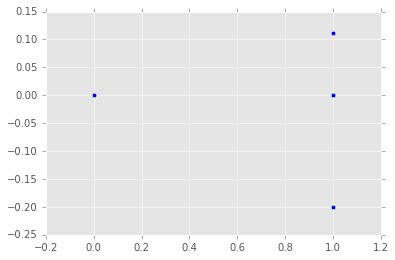

In [79]:
x = sample_form
y = sample_concreteness

plt.scatter(x,y)
plt.show()

In [80]:
X = list(zip(sample_form, sample_concreteness))

In [81]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print(centroids)
print(labels)

[[ 1.         -0.02222222]
 [ 0.          0.        ]]
[0 0 1 0 0]


coordinate: (1, 0.1111111111111111) label: 0
coordinate: (1, 0.0) label: 0
coordinate: (0, 0.0) label: 1
coordinate: (1, 0.0) label: 0
coordinate: (1, -0.20000000000000001) label: 0


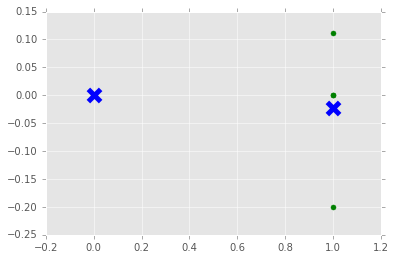

In [82]:
colors = ["g.","r."]

for i in range(len(X)):
    print("coordinate:",X[i], "label:", labels[i])
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, 0],centroids[:, 1], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()

In [83]:
#Classify each poem
classification = []
for i in range(output_tb.num_rows):
    form = output_tb.column('Form')[i]
    concrete = output_tb.column('Concrete/Abstract')[i]
    X = list(zip(form, concrete))
    kmeans.fit(X)
    classification.append(kmeans.labels_)

In [84]:
output_tb = output_tb.with_column('Turn Form', classification)

In [85]:
output_tb.show()

Title,Form,Concrete/Abstract,Turn Form,Stemmed Abstract Metric
A Girl,"[0, 0, 0, 0, 1, 1, 1, 0, 0, 0]","[-0.16666666666666666, 0.0, -0.125, 0.0, 0.0, -0.3333333 ...",[1 1 1 1 0 0 0 1 1 1],"[-0.16666666666666666, 0.0, -0.125, 0.0, 0.0, -0.3333333 ..."
A Pact,"[0, 0, 0, 0, 0, 0, 0, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",[0 0 0 0 0 0 0 0 0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
In A Station of the Metro,"[1, 1]","[0.0, 0.0]",[0 0],"[0.0, 0.0]"
Alba,"[0, 0, 0]","[0.0, 0.0, 0.0]",[0 0 0],"[0.0, 0.0, 0.0]"
An Immorality,"[0, 1, 1, 0, 1, 1, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",[0 1 1 0 1 1 0 0],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
And The Days Are Not Full Enough,"[1, 1, 0, 0]","[0.0, 0.0, 0.0, -0.25]",[0 0 1 1],"[0.0, 0.0, 0.0, -0.25]"
"Fan-Piece, For Her Imperial Lord","[0, 0, 0]","[-0.20000000000000001, 0.0, 0.0]",[1 0 0],"[-0.20000000000000001, 0.0, 0.0]"
Grace Before Song,"[0, 1, 1, 0, 1, 1, 1, 1, 1, 1]","[0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1111111111 ...",[0 1 1 0 1 1 1 1 1 1],"[0.125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.1111111111 ..."
"Ione, Dead the Long Year","[0, 0, 0, 0, 0, 0, 0, 1, 1]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",[0 0 0 0 0 0 0 1 1],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
Ité,"[1, 1, 1, 0, 0]","[0.0, 0.0, 0.0, 0.0, 0.0]",[1 1 1 0 0],"[0.0, 0.0, 0.0, 0.0, 0.0]"


# Alternate Measures of Abstractness

## WordNet

In [40]:
from nltk.tokenize import word_tokenize
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.snowball  import SnowballStemmer
from nltk.stem import WordNetLemmatizer

In [41]:
from nltk.tag.perceptron    import PerceptronTagger
from nltk.tag.brill         import BrillTagger
from nltk.tag.stanford      import StanfordTagger, StanfordPOSTagger, StanfordNERTagger

In [42]:
from nltk.corpus import wordnet as wn

**General Inquirer with Stemming**

In [43]:
from nltk.stem.snowball import SnowballStemmer
english_stemmer = SnowballStemmer('english')

In [ ]:
concrete_tb = inquirer.select(['Entry', 'Object', 'ABS'])

In [48]:
stem_entry = concrete_tb.apply(english_stemmer.stem, 'Entry')
concrete_tb_stemmed = Table().with_columns(['Entry Stem', stem_entry,
                                         'Object', concrete_tb.column('Object'),
                                          'ABS', concrete_tb.column('ABS')
                                         ])

In [49]:
def stem_is_abstract_or_concrete(word):
    word_attributes = concrete_tb.where('Entry Stem', word.lower())
    if word_attributes.num_rows == 0:
        return 0
    elif word_attributes.column('Object')[0] == 'Object':
        return -1
    elif word_attributes.column('ABS')[0] == 'ABS':
        return 1
    else:
        return 0

In [50]:
def stem_abstract_metric(line):
    s = line
    s = "".join(char for char in s if char not in string.punctuation)
    s = s.replace('-', ' ')
    s = s.split(' ')
    return sum([stem_is_abstract_or_concrete(word) for word in s]) / len(s)

In [53]:
def stem_apply_abstract_metric(poem):
    return [abstract_metric(_line) for _line in poem]

In [54]:
stem_percent_abstract = [stem_apply_abstract_metric(poem) for poem in short_lyrics]

In [56]:
output_tb = output_tb.with_column('Stemmed Abstract Metric', stem_percent_abstract)

**Abstract/Concrete by Noun Counts**